In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import NullFormatter

np.set_printoptions(precision=4, suppress=True)

In [2]:
# define the broken/good cobras
#brokens = [1, 2, 39, 43, 54]
brokens = []
visibles= [e for e in range(1,58) if e not in brokens]
badIdx = np.array(brokens) - 1
goodIdx = np.array(visibles) - 1
mod = 'SC09'

# two groups for two cameras
cam_split = 28
group1 = goodIdx[goodIdx <= cam_split]
group2 = goodIdx[goodIdx > cam_split]

In [22]:
path = '/data/MCS/20200821_015/data/'
centers = np.load(path + 'phiCenter.npy')
radius = np.load(path + 'phiRadius.npy')
fw = np.load(path + 'phiFW.npy')
rv = np.load(path + 'phiRV.npy')
af = np.load(path + 'phiAngFW.npy')
ar = np.load(path + 'phiAngRV.npy')
sf = np.load(path + 'phiSpeedFW.npy')
sr = np.load(path + 'phiSpeedRV.npy')
mf = np.load(path + 'phiMMFW.npy')
mr = np.load(path + 'phiMMRV.npy')
badM = np.load(path + 'badMotorMap.npy')
badR = np.load(path + 'badRange.npy')
steps = int(np.load(path + 'steps.npy'))
ontime = np.load(path + 'ontime.npy')

In [ ]:
path = '/data/MCS/20191029_005/data/'
centersX = np.load(path + 'phiCenter.npy')
radiusX = np.load(path + 'phiRadius.npy')
fwX = np.load(path + 'phiFW.npy')
rvX = np.load(path + 'phiRV.npy')
afX = np.load(path + 'phiAngFW.npy')
arX = np.load(path + 'phiAngRV.npy')
sfX = np.load(path + 'phiSpeedFW.npy')
srX = np.load(path + 'phiSpeedRV.npy')
mfX = np.load(path + 'phiMMFW.npy')
mrX = np.load(path + 'phiMMRV.npy')
badX = np.load(path + 'bad.npy')

In [ ]:
centers = np.load(path + 'phiCenter_A.npy')
radius = np.load(path + 'phiRadius_A.npy')
fw = np.load(path + 'phiFW_A.npy')
rv = np.load(path + 'phiRV_A.npy')
af = np.load(path + 'phiAngFW_A.npy')
ar = np.load(path + 'phiAngRV_A.npy')
sf = np.load(path + 'phiSpeedFW_A.npy')
sr = np.load(path + 'phiSpeedRV_A.npy')
mf = np.load(path + 'phiMMFW_A.npy')
mr = np.load(path + 'phiMMRV_A.npy')
bad = np.load(path + 'bad_A.npy')
mf2 = np.load(path + 'phiMMFW2_A.npy')
mr2 = np.load(path + 'phiMMRV2_A.npy')
bad2 = np.load(path + 'bad2_A.npy')

In [ ]:
badM, badR

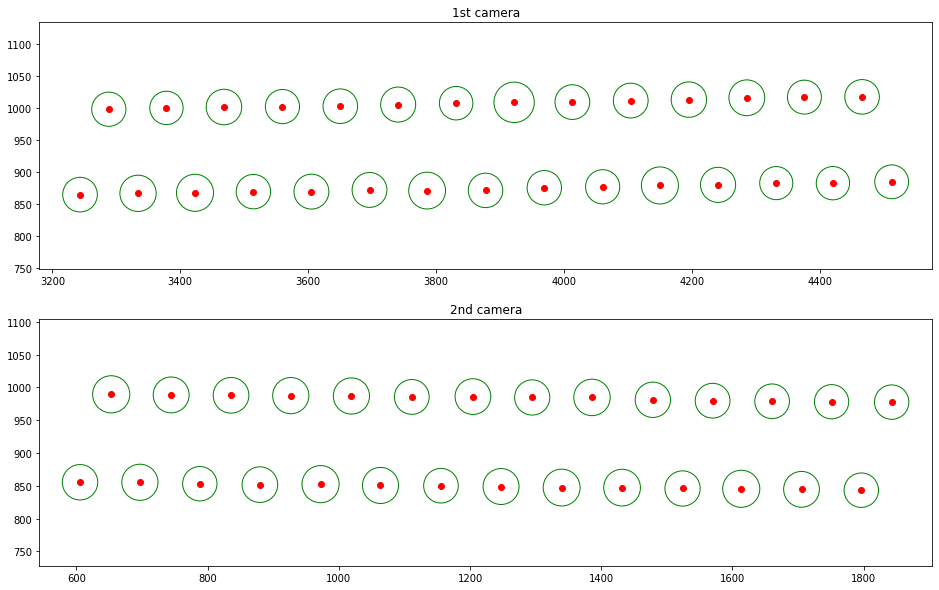

In [15]:
plt.figure(1, figsize=(16,10))
plt.clf()

plt.subplot(211)
ax = plt.gca()

ax.plot(centers[group1].real, centers[group1].imag, 'ro')
ax.axis('equal')
for idx in group1:
    c = plt.Circle((centers[idx].real, centers[idx].imag), radius[idx], color='g', fill=False)
    ax.add_artist(c)
ax.set_title(f'1st camera')

plt.subplot(212)
ax = plt.gca()

ax.plot(centers[group2].real, centers[group2].imag, 'ro')
ax.axis('equal')
for idx in group2:
    c = plt.Circle((centers[idx].real, centers[idx].imag), radius[idx], color='g', fill=False)
    ax.add_artist(c)
ax.set_title(f'2nd camera')

plt.show()

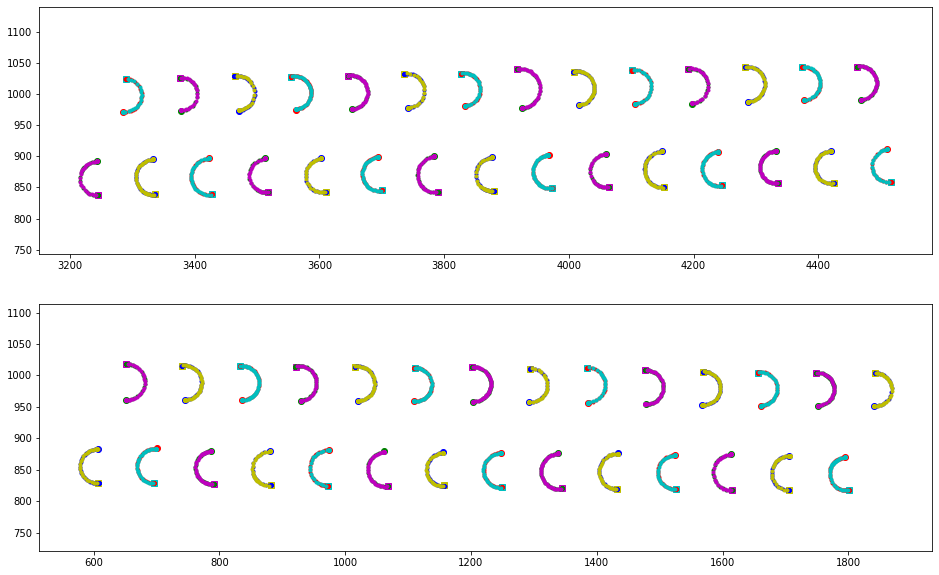

In [10]:
plt.figure(2, figsize=(16,10))
plt.clf()

plt.subplot(211)
ax = plt.gca()
ax.axis('equal')

for n in range(fw.shape[1]):
    for k in group1:
        if k % 3 == 0:
            c = 'r'
            d = 'c'
        elif k % 3 == 1:
            c = 'g'
            d = 'm'
        else:
            c = 'b'
            d = 'y'
        ax.plot(fw[k][n,0].real, fw[k][n,0].imag, c + 'o')
        ax.plot(rv[k][n,0].real, rv[k][n,0].imag, d + 's')
        ax.plot(fw[k][n,1:].real, fw[k][n,1:].imag, c + '.')
        ax.plot(rv[k][n,1:].real, rv[k][n,1:].imag, d + '.')

plt.subplot(212)
ax = plt.gca()
ax.axis('equal')

for n in range(fw.shape[1]):
    for k in group2:
        if k % 3 == 0:
            c = 'r'
            d = 'c'
        elif k % 3 == 1:
            c = 'g'
            d = 'm'
        else:
            c = 'b'
            d = 'y'
        ax.plot(fw[k][n,0].real, fw[k][n,0].imag, c + 'o')
        ax.plot(rv[k][n,0].real, rv[k][n,0].imag, d + 's')
        ax.plot(fw[k][n,1:].real, fw[k][n,1:].imag, c + '.')
        ax.plot(rv[k][n,1:].real, rv[k][n,1:].imag, d + '.')

plt.show()

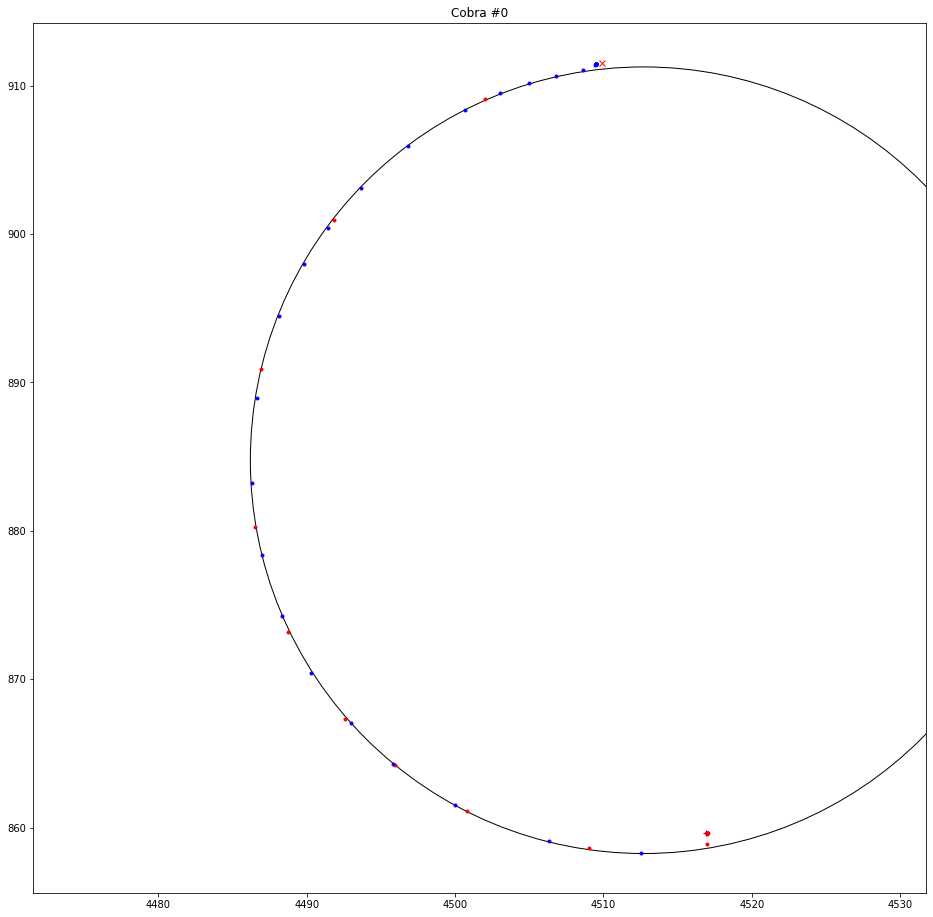

In [23]:
plt.figure(figsize=(16,16))
ax = plt.gca()
ax.axis('equal')
k = 0
ax.set_title(f'Cobra #{k}')

c = plt.Circle((centers[k].real, centers[k].imag), radius[k], fill=False)
ax.add_artist(c)

for n in range(fw.shape[1]):
    c = 'r'
    d = 'b'
    ax.plot(fw[k][n,0].real, fw[k][n,0].imag, c + 'x')
    ax.plot(rv[k][n,0].real, rv[k][n,0].imag, d + '+')
    ax.plot(fw[k][n,1:].real, fw[k][n,1:].imag, c + '.')
    ax.plot(rv[k][n,1:].real, rv[k][n,1:].imag, d + '.')

In [18]:
with PdfPages(f'pdf/{mod}_phi_measure.pdf') as pdf:
    for k in range(57):
        fig = plt.figure(figsize=(16,16))
        ax = plt.gca()
        ax.axis('equal')
        ax.set_title(f'Cobra #{k+1}')

        c = plt.Circle((centers[k].real, centers[k].imag), radius[k], fill=False)
        ax.add_artist(c)

        for n in range(fw.shape[1]):
            c = 'r'
            d = 'b'
            ax.plot(fw[k][n,0].real, fw[k][n,0].imag, c + 'x')
            ax.plot(rv[k][n,0].real, rv[k][n,0].imag, d + '+')
            ax.plot(fw[k][n,1:].real, fw[k][n,1:].imag, c + '.')
            ax.plot(rv[k][n,1:].real, rv[k][n,1:].imag, d + '.')

        pdf.savefig(fig)
        plt.close()

In [ ]:
with PdfPages(f'pdf/{mod}_phi_{steps}.pdf') as pdf:
    for c in range(57):
        fig = plt.figure(figsize=(16,6))
        ax = plt.gca()
        ax.set_title(f'Cobra {mod} #{c+1} PHI @ {steps}steps')
        for n in range(af.shape[1]):
            ax.plot(np.rad2deg(af[c,n,:-1]), np.rad2deg(af[c,n,1:]-af[c,n,:-1])/steps, '.')
            ax.plot(np.rad2deg(ar[c,n,1:]), np.rad2deg(ar[c,n,1:]-ar[c,n,:-1])/steps, '.')
            ax.plot([0,190], [0,0], 'r')
        pdf.savefig(fig)
        plt.close()

In [ ]:
for c in range(57):
    fig = plt.figure(figsize=(16,6))
    ax = plt.gca()
    ax.set_title(f'Cobra {mod} #{c+1} PHI @ {steps}steps')
    for n in range(af.shape[1]):
        ax.plot(np.rad2deg(af[c,n,:-1]), np.rad2deg(af[c,n,1:]-af[c,n,:-1])/steps, '.')
        ax.plot(np.rad2deg(ar[c,n,1:]), np.rad2deg(ar[c,n,1:]-ar[c,n,:-1])/steps, '.')
        ax.plot([0,190], [0,0], 'r')
    plt.show()

In [ ]:
plt.figure(4, figsize=(12,8))
#plt.clf()

plt.plot(np.rad2deg(sf), 'r.')
plt.plot(np.rad2deg(sr), 'g.')

#with PdfPages(f'pdf/SC34_phi_slow.pdf') as pdf:
#    pdf.savefig()

In [ ]:
fig, axs = plt.subplots(57, figsize=(12,200))

for c in range(57):
#    plt.figure(3)
#    plt.clf()
#    ax = plt.gca()
    axs[c].set_title(f'#{c}')
    for n in range(af.shape[1]):
        axs[c].plot(af[c, n], '.')
        axs[c].plot(ar[c, n], '.')

#with PdfPages(f'pdf/SC34_phi_250.pdf') as pdf:
#    pdf.savefig()
plt.show()

In [ ]:
plt.figure(4, figsize=(12,8))
#plt.clf()

plt.plot(np.rad2deg(sf), 'r.')
plt.plot(np.rad2deg(sr), 'g.')

#with PdfPages(f'pdf/SC34_phi_slow.pdf') as pdf:
#    pdf.savefig()

In [ ]:
c = 6

ax = plt.gca()
ax.set_title(f'#{c}')
for n in range(afX.shape[1]):
    ax.plot(afX[c, n], '.')
    ax.plot(arX[c, n], '.')

In [ ]:
c = 6

plt.figure(4)
plt.clf()
ax = plt.gca()
ax.set_title(f'#{c}')

ax.plot(np.rad2deg(mf[c]), 'r')
ax.plot(np.rad2deg(mfX[c]), 'm')
ax.plot(np.rad2deg(mr[c]), 'g')
ax.plot(np.rad2deg(mrX[c]), 'b')

ax.set_xlim([0,56])

In [ ]:
x=np.arange(mf.shape[1])*3.6
c = 6
step = 150

plt.figure(4)
plt.clf()
ax = plt.gca()
ax.set_title(f'#{c} FW')

for data in af[c]:
#    for i in range(len(data)-1):
    for i in range(14):
        spd = np.rad2deg(data[i+1] - data[i]) / step
        ax.plot([np.rad2deg(data[i]), np.rad2deg(data[i+1])], [spd, spd], color='gray')

ax.plot(x, np.rad2deg(mf[c]), 'r')
#ax.plot(x,np.rad2deg(mf2[c]), 'pink')

ax.set_xlim([0,190])

In [ ]:
x=np.arange(mf.shape[1])*3.6
c = 5
step = 400

plt.figure(4)
plt.clf()
ax = plt.gca()
ax.set_title(f'#{c} RV')

for data in ar[c]:
    for i in range(len(data)-1):
        spd = np.rad2deg(data[i] - data[i+1]) / step
        ax.plot([np.rad2deg(data[i+1]), np.rad2deg(data[i])], [spd, spd], color='gray')

ax.plot(x, np.rad2deg(mr[c]), 'r')
#ax.plot(x,-np.rad2deg(mr2[c]), color='pink')

ax.set_xlim([0,190])

In [ ]:
path = '/data/MCS/20191114_006/data/'
data = np.load(path + 'phiData.npy')

In [ ]:
c = 1

plt.figure(5)
plt.clf()
for n in range(data.shape[1]):
    plt.plot(np.rad2deg(data[c,n,:,0]))

In [ ]:
np.rad2deg(data[1,9,:,0]), data[1,9,:,3]

In [ ]:
from ics.cobraCharmer import pfiDesign
import pathlib

In [ ]:
xml = pathlib.Path('/data/MCS/20200114_009/output/SC34_phi_fast.xml')
#xml = pathlib.Path('/home/pfs/Documents/cwen/ics_cobraCharmer/xml/SC34_07.xml')
model = pfiDesign.PFIDesign(xml)

In [ ]:
xml = pathlib.Path('/data/MCS/20200112_023/output/SC34_phi_fast.xml')
model2 = pfiDesign.PFIDesign(xml)

In [ ]:
model.motorOntimeSlowFwd2, model.motorOntimeSlowRev2

In [ ]:
model.centers

In [ ]:
tfs = model.motorOntimeSlowFwd2.copy()
trs = model.motorOntimeSlowRev2.copy()
tff = model.motorOntimeFwd2.copy()
trf = model.motorOntimeRev2.copy()

In [ ]:
tfs2 = model2.motorOntimeSlowFwd2.copy()
trs2 = model2.motorOntimeSlowRev2.copy()
tff2 = model2.motorOntimeFwd2.copy()
trf2 = model2.motorOntimeRev2.copy()

In [ ]:
c = 21
tfs[c], trs[c], tff[c], trf[c]

In [ ]:
tfs[21] = 0.03
trs[21] = 0.034
tff[21] = 0.043
trf[21] = 0.05

In [ ]:
model.updateOntimes(phiFwd=tff, phiRev=trf, fast=True)
model.updateOntimes(phiFwd=tfs, phiRev=trs, fast=False)
model.createCalibrationFile('/home/pfs/Documents/cwen/ics_cobraCharmer/xml/SC34_08.xml')

In [ ]:
path = '/data/MCS/20191207_003/data/'
data = np.load(path + 'phiData.npy')

In [ ]:
angles = np.linspace(15,165,16)
print(np.where(abs(np.rad2deg(data[goodIdx,:,7,0])-angles)>0.2))
print(np.where(abs(np.rad2deg(data[goodIdx,:,7,0])-angles)>0.1))
print(np.where(abs(np.rad2deg(data[goodIdx,:,7,0])-angles)>0.1)[0].shape[0])
print(np.amax(abs(np.rad2deg(data[goodIdx,:,:,0])-angles[:,np.newaxis]), axis=(0,1)))
np.average(abs(np.rad2deg(data[goodIdx,:,:,0])-angles[:,np.newaxis]), axis=(0,1))

In [ ]:
c = 35

plt.figure(4)
plt.clf()
for n in range(data.shape[1]):
    plt.plot(np.rad2deg(data[c,n,:,0]))

In [ ]:
#bad = [37]
#useable= [e for e in range(1,58) if e not in bad]
#idx = np.array(useable) - 1
idx = goodIdx

for run in range(8):
#    plt.figure()
    d = (np.rad2deg(data[idx,:,:,0])-angles[:,np.newaxis])[:,:,run]

    plt.subplot(121)
#    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Diff angles #{run+1}')
#    plt.grid(True)
    plt.hist(d.flatten(), bins='auto')

    plt.subplot(122)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Absolute diffs #{run+1}')
    plt.grid(True)
    plt.hist(abs(d).flatten(), bins='auto')

    plt.gca().yaxis.set_minor_formatter(NullFormatter())
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.35)
    with PdfPages(f'pdf/{mod}_phi_80_{run+1}.pdf') as pdf:
        pdf.savefig()
    plt.show()

In [24]:
datadir = '/data/MCS/20200821_016'
angles = np.load(f'{datadir}/data/angles.npy')
ontimes = np.load(f'{datadir}/data/ontimes.npy')
speeds = np.load(f'{datadir}/data/speeds.npy')
goodIdx = np.load(f'{datadir}/data/cobras.npy')
parameters = np.load(f'{datadir}/data/parameters.npy')

In [25]:
with PdfPages(f'pdf/{mod}_phi_scan3.pdf') as pdf:
    for idx in range(len(ontimes)):
        fig = plt.figure(figsize=(20,30))
        ax1 = plt.subplot(411)
        ax1.set_title(f'Cobra #{goodIdx[idx]+1}: On-time (phi, Forward)')
        ax2 = plt.subplot(412)
        ax2.set_title(f'Cobra #{goodIdx[idx]+1}: Step size (phi, Forward)')
        ax3 = plt.subplot(413)
        ax3.set_title(f'Cobra #{goodIdx[idx]+1}: On-time (phi, Backward)')
        ax4 = plt.subplot(414)
        ax4.set_title(f'Cobra #{goodIdx[idx]+1}: Step size (phi, Backward)')

        for repeat in range(ontimes.shape[1]):
            data = ontimes[idx,repeat,0]*1000
            nz = np.where(data == 0)[0]
            if len(nz) > 0:
                upper = np.where(data == 0)[0][0] - 1
            else:
                upper = len(data)
            xdata = np.rad2deg(angles)[idx,repeat,0,:upper]
            data1 = np.rad2deg(speeds[idx,repeat,0])
            ax1.plot(xdata, data[:upper], '.', label=f'{repeat+1}')
            ax2.plot(xdata, data1[:upper], '.', label=f'{repeat+1}')

            data = ontimes[idx,repeat,1]*1000
            nz = np.where(data == 0)[0]
            if len(nz) > 0:
                upper = np.where(data == 0)[0][0]
            else:
                upper = len(data)
            xdata = np.rad2deg(angles)[idx,repeat,1,:upper]
            data1 = -np.rad2deg(speeds[idx,repeat,1])
            ax3.plot(xdata, data[:upper], '.', label=f'{repeat+1}')
            ax4.plot(xdata, data1[:upper], '.', label=f'{repeat+1}')

        ax1.legend()
        ax2.legend()
        ax3.legend()
        ax4.legend()
        pdf.savefig(fig)
        plt.close()

In [26]:
def smooth(x, window_len=21, window='hamming'):
    s = np.r_[x[window_len-1:0:-1], x, x[-2:-window_len-1:-1]]
    w = eval('np.' + window + '(window_len)')
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[(window_len//2):-(window_len//2)]

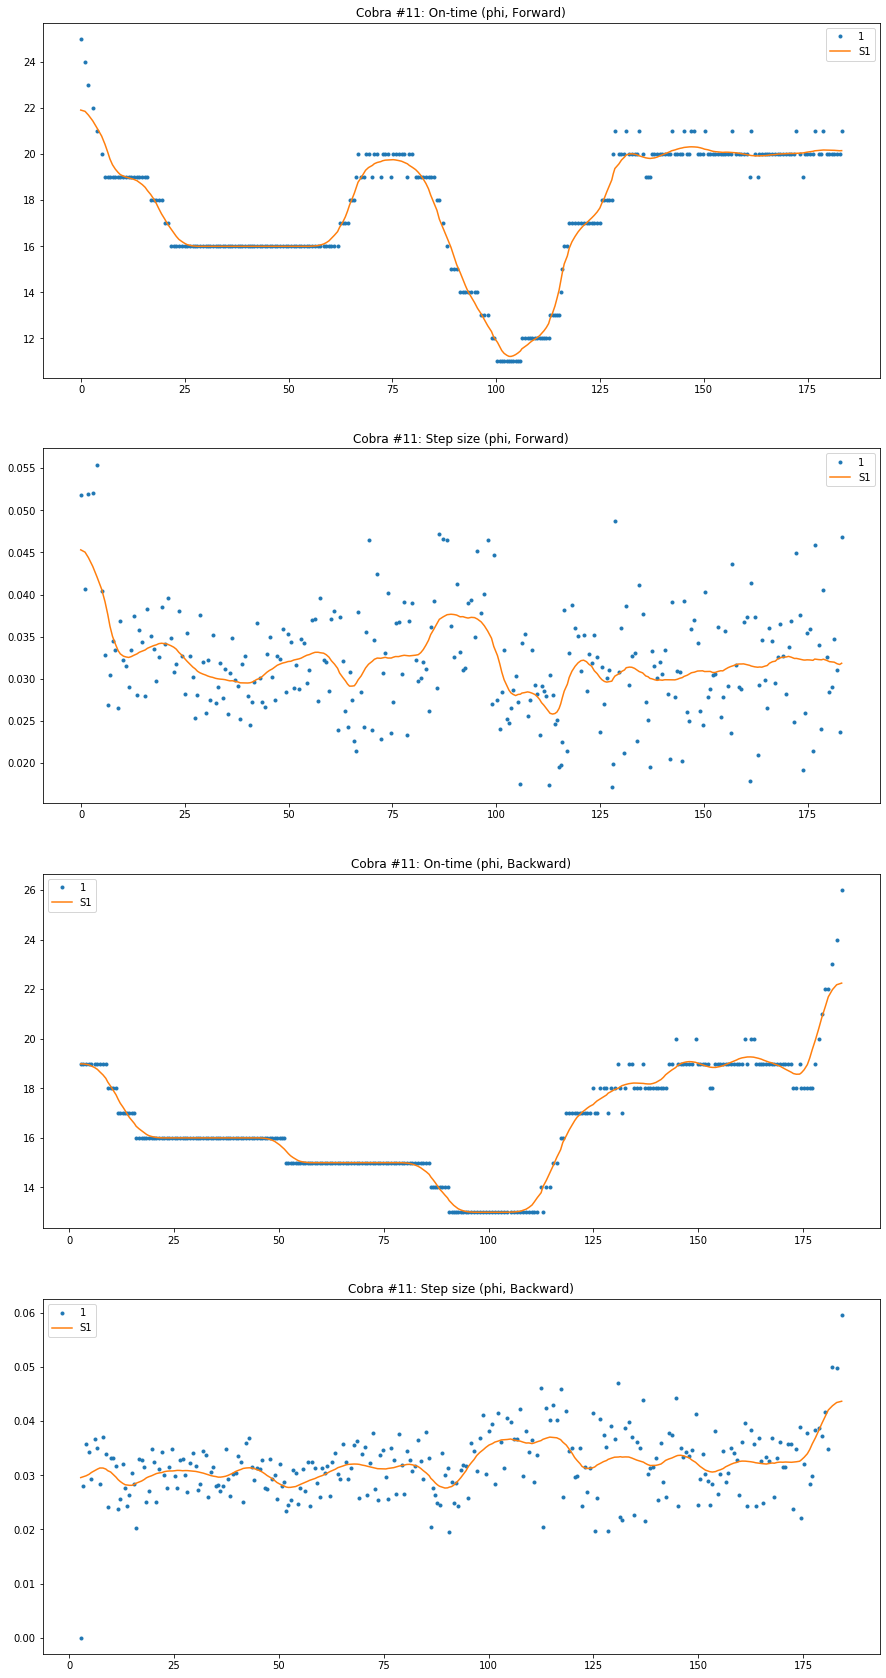

In [27]:
idx = 10

plt.figure(figsize=(15,30))
ax1 = plt.subplot(411)
ax1.set_title(f'Cobra #{goodIdx[idx]+1}: On-time (phi, Forward)')
ax2 = plt.subplot(412)
ax2.set_title(f'Cobra #{goodIdx[idx]+1}: Step size (phi, Forward)')
ax3 = plt.subplot(413)
ax3.set_title(f'Cobra #{goodIdx[idx]+1}: On-time (phi, Backward)')
ax4 = plt.subplot(414)
ax4.set_title(f'Cobra #{goodIdx[idx]+1}: Step size (phi, Backward)')

#for repeat in range(ontimes.shape[1]):
for repeat in range(1):
    data = ontimes[idx,repeat,0]*1000
    nz = np.where(data == 0)[0]
    if len(nz) > 0:
        upper = nz[0] - 1
    else:
        upper = len(data)
    xdata = np.rad2deg(angles)[idx,repeat,0,:upper]
    data1 = np.rad2deg(speeds[idx,repeat,0])
    ax1.plot(xdata, data[:upper], '.', label=f'{repeat+1}')
    ax1.plot(xdata, smooth(data[:upper]), label=f'S{repeat+1}')
    ax2.plot(xdata, data1[:upper], '.', label=f'{repeat+1}')
    ax2.plot(xdata, smooth(data1[:upper]), label=f'S{repeat+1}')

    data = ontimes[idx,repeat,1]*1000
    nz = np.where(data == 0)[0]
    if len(nz) > 0:
        upper = nz[0]
    else:
        upper = len(data)
    xdata = np.rad2deg(angles)[idx,repeat,1,:upper]
    data1 = -np.rad2deg(speeds[idx,repeat,1])
    ax3.plot(xdata, data[:upper], '.', label=f'{repeat+1}')
    ax3.plot(xdata, smooth(data[:upper]), label=f'S{repeat+1}')
    ax4.plot(xdata, data1[:upper], '.', label=f'{repeat+1}')
    ax4.plot(xdata, smooth(data1[:upper]), label=f'S{repeat+1}')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

In [28]:
mmDtype = np.dtype(dict(names=['angle', 'ontime', 'speed'], formats=['f4', 'f4', 'f4']))

In [29]:
mm = np.full((angles.shape[0],2,angles.shape[3]-1), np.nan, dtype=mmDtype)

for i in range(angles.shape[0]):
    for j in range(2):
        nz = np.where(ontimes[i,0,j] == 0)[0]
        if len(nz) > 0:
            upper = nz[0] - 1
        else:
            upper = ontimes.shape[3] - 1
        mm[i,j,:upper]['angle'] = angles[i,0,j,:upper]
        mm[i,j,:upper]['ontime'] = smooth(ontimes[i,0,j,:upper])
        mm[i,j,:upper]['speed'] = smooth(speeds[i,0,j,:upper])

In [30]:
np.save('mmPhiSlow2', mm)

In [31]:
angMax = np.nanmax(mm['angle'], axis=2)
angMin = np.nanmin(mm['angle'], axis=2)
angMargin = np.deg2rad(15)
ot = np.zeros((mm.shape[0],2))

for i in range(mm.shape[0]):
    for j in range(2):
        x = mm[i,j]['angle']
        mask = ~np.isnan(x)
        mask[mask] &= x[mask] > angMin[i,j] + angMargin
        mask[mask] &= x[mask] < angMax[i,j] - angMargin
        ot[i,j] = np.nanmax(mm[i,j,mask]['ontime']) + np.nanmin(mm[i,j,mask]['ontime'])

ot[ot > 0.12] = 0.12

In [32]:
ot.T

array([[0.0524, 0.0249, 0.0364, 0.0217, 0.0284, 0.0211, 0.0354, 0.029 ,
        0.0271, 0.0284, 0.0315, 0.02  , 0.028 , 0.0346, 0.0422, 0.0314,
        0.0313, 0.0327, 0.0484, 0.025 , 0.022 , 0.0247, 0.0258, 0.0454,
        0.0351, 0.0399, 0.0313, 0.0313, 0.0382, 0.039 , 0.024 , 0.0225,
        0.0528, 0.02  , 0.0481, 0.0303, 0.0209, 0.0347, 0.0237, 0.034 ,
        0.021 , 0.031 , 0.0301, 0.0314, 0.0335, 0.0286, 0.0229, 0.0238,
        0.0463, 0.0288, 0.0425, 0.0312, 0.0229, 0.026 , 0.0222, 0.0399,
        0.0211],
       [0.0394, 0.0277, 0.0376, 0.0228, 0.0261, 0.023 , 0.0319, 0.029 ,
        0.0269, 0.0282, 0.0323, 0.024 , 0.0285, 0.0364, 0.0516, 0.0326,
        0.032 , 0.0288, 0.0405, 0.0302, 0.021 , 0.0262, 0.0307, 0.0457,
        0.0344, 0.0359, 0.03  , 0.0356, 0.0383, 0.0403, 0.0222, 0.0217,
        0.051 , 0.0211, 0.0494, 0.0339, 0.02  , 0.033 , 0.0334, 0.04  ,
        0.0214, 0.0329, 0.0311, 0.0278, 0.026 , 0.0292, 0.021 , 0.0213,
        0.0412, 0.0321, 0.0332, 0.0309, 0.024 ,